In [2]:
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  
#import cv
from PIL import Image

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
# Any results you write to the current directory are saved as output.
import sys

sys.path

sys.executable

'C:\\Users\\sulem\\Anaconda3\\python.exe'

In [393]:
#im = cv2.LoadImage("C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset")
infilename="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/0"

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

Working with 206 images
Image examples: 
IMG_4234.JPG


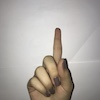

IMG_4244.JPG


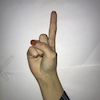

In [401]:
folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset"
d = 1
d=str(d)
folder=folder+"/"+ d
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [494]:
from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
x_flat = np.zeros((2062,10000))
x_g= np.zeros((100,100))
i=0
for d in range(0,10):
 folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset"
 d=str(d)
 folder=folder+"/"+ d
 onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

 train_files = []
 y_train = []


 for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))

 # Original Dimensions
 image_width = 400
 image_height = 400
 ratio = 4

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.float32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 99):
     x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 )
    x_flat[i]=x_g.ravel()
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 205
205 images to array
Files in train_files: 206
206 images to array
Files in train_files: 206
412 images to array
Files in train_files: 206
618 images to array
Files in train_files: 207
828 images to array
Files in train_files: 207
1035 images to array
Files in train_files: 207
1242 images to array
Files in train_files: 206
1648 images to array
Files in train_files: 208
1664 images to array
Files in train_files: 204
2040 images to array
All images to array!


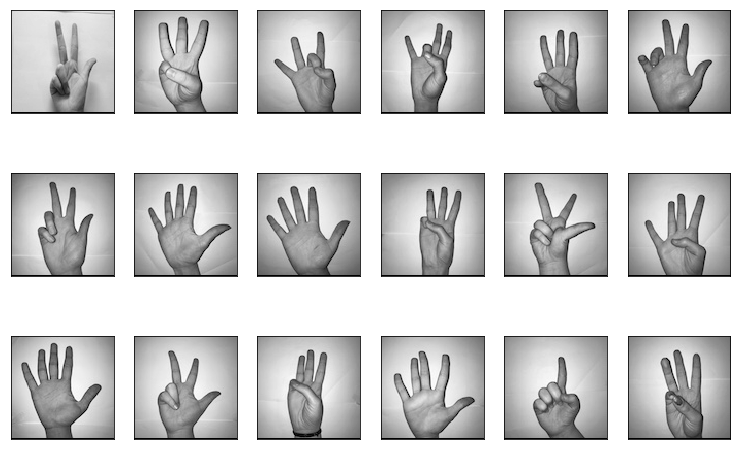

In [522]:
def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,2062, 100, 100) # defaults to showing a 3 by 6 subset of the faces

In [548]:
from sklearn.decomposition import PCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 100, 100))


Extracting the top 500 eigenfaces from 2062 faces
Wall time: 6.64 s


In [549]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

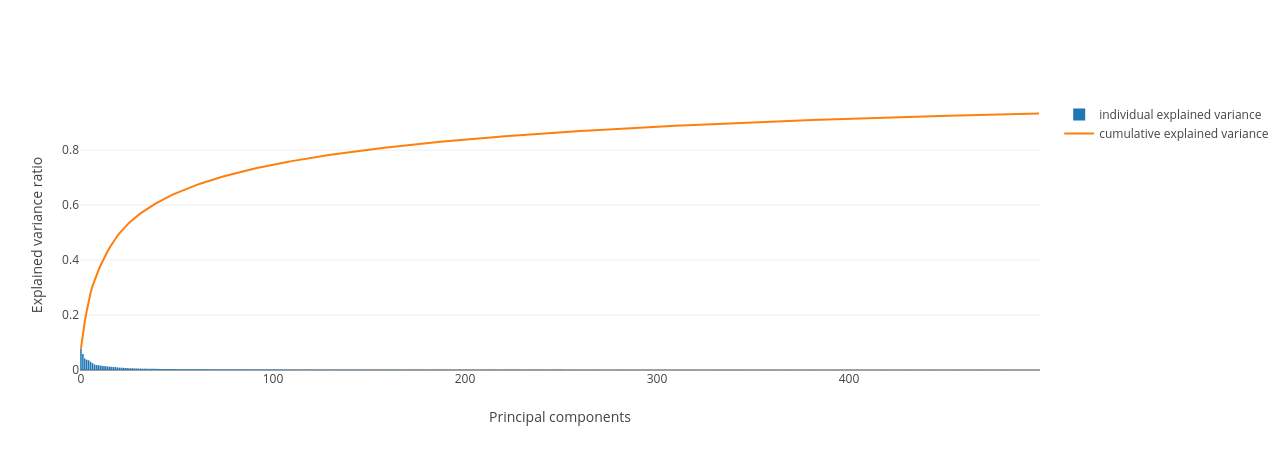

In [550]:
plot_explained_variance(pca)

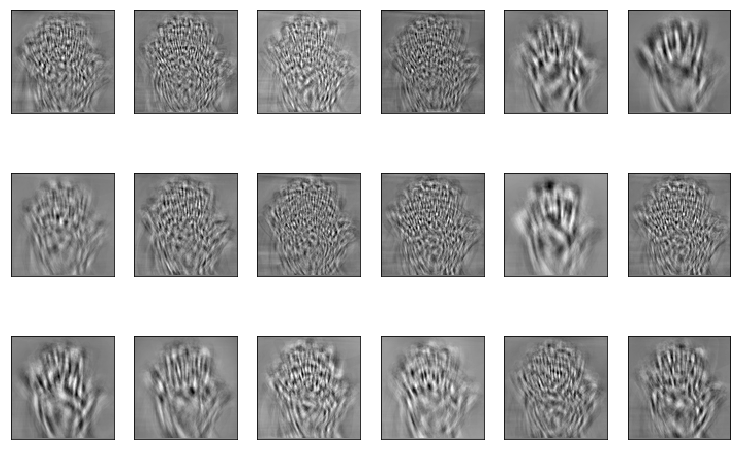

In [552]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 100, 100)

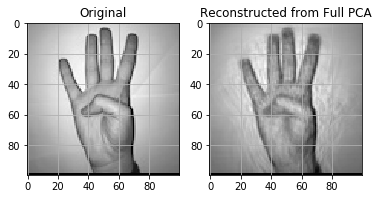

In [566]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = np.random.randint(1000)   
X_idx = x_flat[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))


plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((100, 100)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((100, 100)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

In [578]:
from sklearn.decomposition import PCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 100, 100))

Extracting the top 500 eigenfaces from 2062 faces
Wall time: 7.53 s


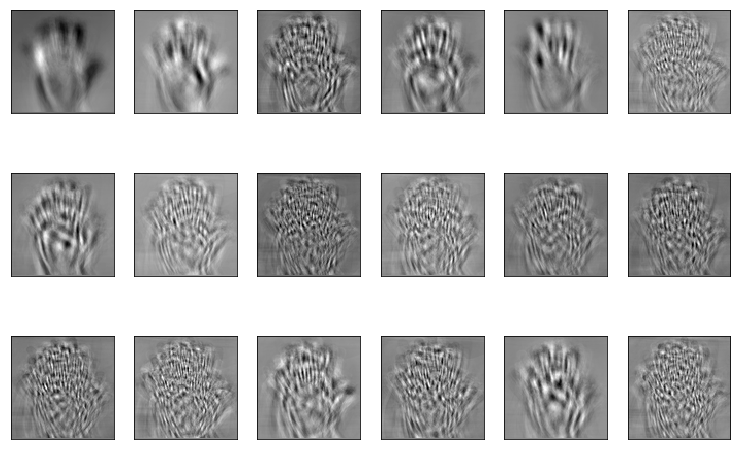

In [579]:
plot_gallery(eigenfingers, 500, 100,100)

In [586]:
from sklearn.decomposition import PCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces, not calculating inverse transform" % (
    n_components, x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=False, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

Extracting the top 500 eigenfaces from 2062 faces, not calculating inverse transform


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=12, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=500, n_jobs=None,
     random_state=None, remove_zero_eig=True, tol=0)

In [590]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

Extracting the top 500 eigenfaces from 2062 faces, ALSO getting inverse transform
Wall time: 6.01 s


In [599]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)

h=100
w=100

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,2062-1,1),__manual=True)

interactive(children=(IntSlider(value=1030, description='idx_to_reconstruct', max=2061), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>